# Prediction of death in Heart Failure


### In this lesson, we will predict whether death from arousal failure will occur with the data we have

<a href='https://www.kaggle.com/datasets/aadarshvelu/heart-failure-prediction-clinical-records/data' target=_blank>You can find the data file here</a>

<img src=https://madicanacdnstorage.blob.core.windows.net/main/Assets/photo/r/kalp-yetmezligi-97846_b.jpg width='300'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv('heart_failure_clinical_records.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [4]:
df.shape

(5000, 13)

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.corr(numeric_only=True)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.072581,0.023534,-0.220182,0.249442
anaemia,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
creatinine_phosphokinase,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
diabetes,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
ejection_fraction,0.069380,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
high_blood_pressure,0.092656,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
platelets,-0.024959,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
serum_creatinine,0.178194,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
serum_sodium,-0.026182,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
sex,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


In [8]:
abs(df.corr(numeric_only=True)['DEATH_EVENT'].sort_values(ascending=False))

DEATH_EVENT                 1.000000
serum_creatinine            0.311281
age                         0.249442
high_blood_pressure         0.094023
creatinine_phosphokinase    0.079706
sex                         0.055604
anaemia                     0.054508
smoking                     0.009397
diabetes                    0.011273
platelets                   0.031521
serum_sodium                0.227355
ejection_fraction           0.292702
time                        0.527234
Name: DEATH_EVENT, dtype: float64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

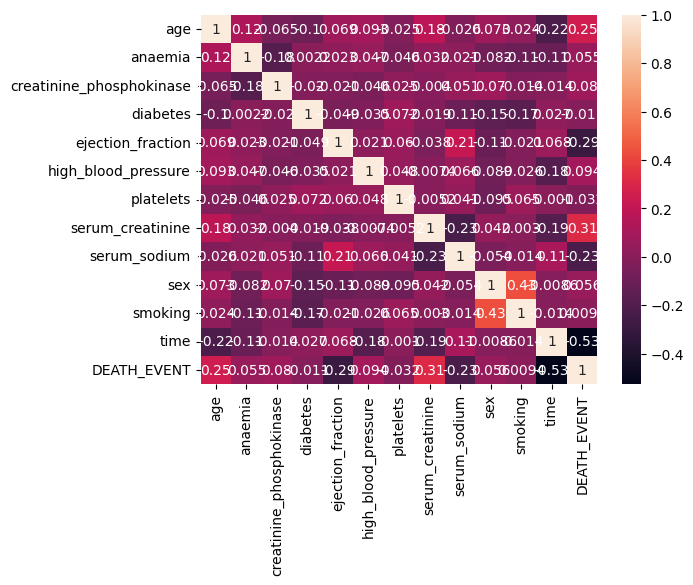

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

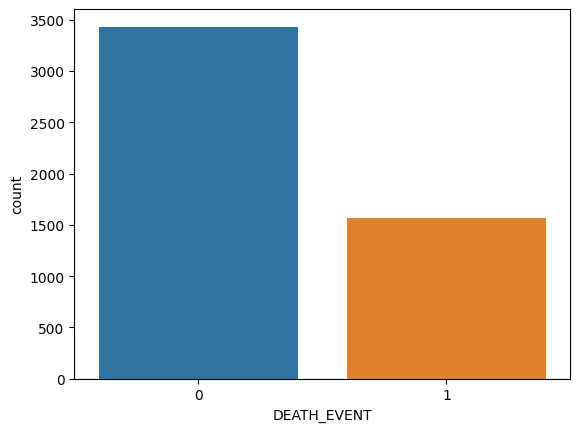

In [11]:
sns.countplot(x=df['DEATH_EVENT']);

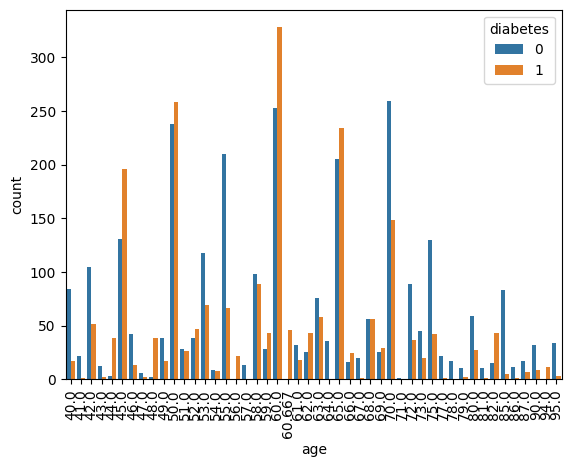

In [12]:
sns.countplot(x=df['age'],hue=df.diabetes)
plt.xticks(rotation=90);
#diabetes is generally seen between the ages of 44-66

In [13]:
x=df.drop('DEATH_EVENT',axis=1)
y=df[['DEATH_EVENT']]

In [14]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [18]:
model=Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=450, verbose=1)

Epoch 1/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.5063 - loss: 6043.1553 - val_accuracy: 0.6980 - val_loss: 302.9243
Epoch 2/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.5791 - loss: 197.8407 - val_accuracy: 0.6980 - val_loss: 250.2084
Epoch 3/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.5807 - loss: 231.6389 - val_accuracy: 0.6980 - val_loss: 405.6317
Epoch 4/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.5941 - loss: 288.4611 - val_accuracy: 0.6840 - val_loss: 56.0119
Epoch 5/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.5782 - loss: 161.4534 - val_accuracy: 0.6980 - val_loss: 748.7480
Epoch 6/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.5752 - loss: 554.7397 - val_accuracy: 0.6990 - val_loss: 217.7422
Epoch 7/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.6045 - loss: 170.1539 - val_accuracy: 0.7120 - val_loss: 17.5410
Epoch 8/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step -

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.6897 - loss: 91.3415 - val_accuracy: 0.7140 - val_loss: 114.4879
Epoch 98/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.7029 - loss: 84.2560 - val_accuracy: 0.4940 - val_loss: 132.5733
Epoch 99/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.6970 - loss: 81.8122 - val_accuracy: 0.6390 - val_loss: 56.4073
Epoch 100/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.7046 - loss: 76.5766 - val_accuracy: 0.5350 - val_loss: 110.5463
Epoch 101/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.7195 - loss: 61.0125 - val_accuracy: 0.5870 - val_loss: 82.3550
Epoch 102/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.6708 - loss: 126.8521 - val_accuracy: 0.7990 - val_loss: 35.4459
Epoch 103/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.7020 - loss: 74.6530 - val_accuracy: 0.8390 - val_loss: 24.0194
Epoch 104/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.7120 - loss: 45.7988 - val_accuracy: 0.8150 - val_loss: 18.9845
Epoch 194/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.7630 - loss: 28.2002 - val_accuracy: 0.7800 - val_loss: 16.1917
Epoch 195/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.7296 - loss: 48.6337 - val_accuracy: 0.7950 - val_loss: 15.3810
Epoch 196/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.7331 - loss: 40.2017 - val_accuracy: 0.7400 - val_loss: 19.6555
Epoch 197/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.7503 - loss: 27.8714 - val_accuracy: 0.6500 - val_loss: 33.2264
Epoch 198/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.6714 - loss: 82.5332 - val_accuracy: 0.7790 - val_loss: 16.5098
Epoch 199/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.7103 - loss: 55.7935 - val_accuracy: 0.8370 - val_loss: 14.0409
Epoch 200/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.7438 - loss: 26.0195 - val_accuracy: 0.5340 - val_loss: 53.7123
Epoch 290/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.7478 - loss: 27.3094 - val_accuracy: 0.7470 - val_loss: 39.7519
Epoch 291/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.7128 - loss: 39.8496 - val_accuracy: 0.6940 - val_loss: 22.4005
Epoch 292/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.7244 - loss: 35.8252 - val_accuracy: 0.7970 - val_loss: 17.3854
Epoch 293/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.7320 - loss: 34.0873 - val_accuracy: 0.5920 - val_loss: 40.7746
Epoch 294/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.7100 - loss: 33.7849 - val_accuracy: 0.8000 - val_loss: 17.3518
Epoch 295/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.7527 - loss: 26.7758 - val_accuracy: 0.7640 - val_loss: 31.4616
Epoch 296/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.7501 - loss: 19.4100 - val_accuracy: 0.7510 - val_loss: 28.7441
Epoch 386/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.6891 - loss: 38.8142 - val_accuracy: 0.7400 - val_loss: 33.6391
Epoch 387/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.7612 - loss: 19.0402 - val_accuracy: 0.8320 - val_loss: 10.1060
Epoch 388/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.7237 - loss: 27.2792 - val_accuracy: 0.7640 - val_loss: 23.6754
Epoch 389/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.7295 - loss: 21.0438 - val_accuracy: 0.8210 - val_loss: 10.9322
Epoch 390/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.7440 - loss: 20.5599 - val_accuracy: 0.7840 - val_loss: 9.8166
Epoch 391/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.7693 - loss: 18.5575 - val_accuracy: 0.8050 - val_loss: 13.3787
Epoch 392/450
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0

In [20]:
loss,accuracy=model.evaluate(x_test,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.7097 - loss: 28.2215


In [21]:
accuracy

0.7089999914169312

In [22]:
tahmin=model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step


In [23]:
model.save('Heart.h5')

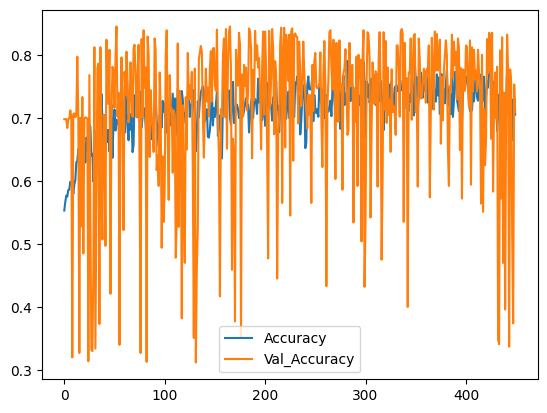

In [24]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

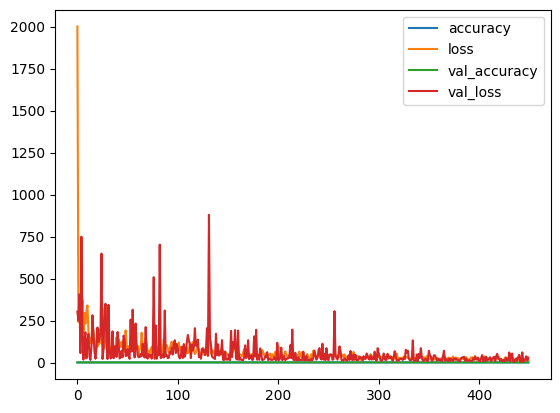

In [25]:
loss_f=pd.DataFrame(history.history)
loss_f.plot();

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [27]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[698,   0],
       [302,   0]])

In [28]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

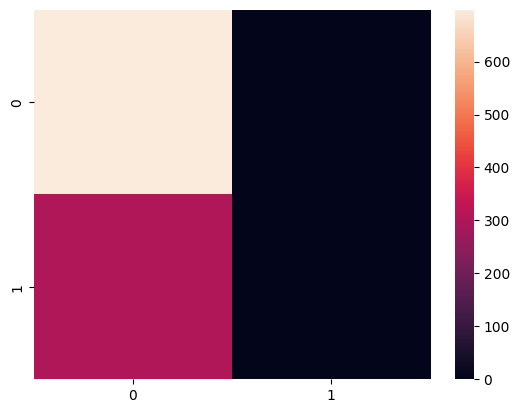

In [29]:

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [30]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       698
           1       0.00      0.00      0.00       302

    accuracy                           0.70      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.49      0.70      0.57      1000



In [31]:
from  sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
#accuaracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier()]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    return best_model,max(results), confusion_matrix(model_predict,y_test)



model_classification(x,y)

Model:  GaussianNB()
Model Accuracy:  0.8273333333333334
Model Confusion Matrix:  [[992 211]
 [ 48 249]] 

Model Classification Report:                precision    recall  f1-score   support

           0       0.95      0.82      0.88      1203
           1       0.54      0.84      0.66       297

    accuracy                           0.83      1500
   macro avg       0.75      0.83      0.77      1500
weighted avg       0.87      0.83      0.84      1500

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.6933333333333334
Model Confusion Matrix:  [[1040  460]
 [   0    0]] 

Model Classification Report:                precision    recall  f1-score   support

           0       1.00      0.69      0.82      1500
           1       0.00      0.00      0.00         0

    accuracy                           0.69      1500
   macro avg       0.50      0.35      0.41      1500
weighted avg       1.00      0.69      0.82      1500

----------------

(RandomForestClassifier(),
 0.9926666666666667,
 array([[1025,   26],
        [  15,  434]]))

In [32]:
r=RandomForestClassifier()

In [33]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
rtahmin=r.predict(x_test)

In [35]:
print(classification_report(rtahmin,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       695
           1       0.99      0.98      0.99       305

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [36]:
confusion_matrix(rtahmin,y_test)

array([[693,   2],
       [  5, 300]])

<Axes: >

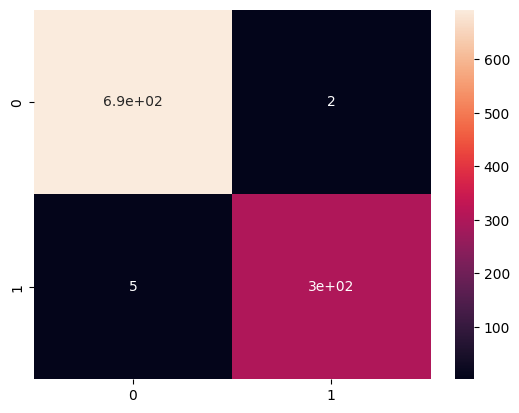

In [37]:
sns.heatmap(confusion_matrix(rtahmin,y_test),annot=True)


# In this lesson, while we got accuracy: 0.7097 - loss: 28.2215 with Deep Learning, we reached 0.99 with RandomForestClassifier
# By obtaining this information, it is possible to treat risk groups earlier